## Problem Statement :

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

- The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

## Step 1: Importing Libraries & Data

In [164]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [165]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline


In [166]:
# Read data from file 'Leads.csv'

lead = pd.read_csv('Leads.csv')
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


## Step 2: Inspecting the Dataframe

In [167]:
lead.shape

(9240, 37)

In [168]:
# Datatypes of each column
lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [169]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 - From above table we can observe that columns 'TotalVisits' , 'Total Time Spent on Website' , 'Page Views Per Visit' contains outliers

In [170]:
lead.City.replace('Select', np.NaN, inplace = True)
lead.Specialization.replace('Select', np.NaN, inplace = True)
lead['How did you hear about X Education'].replace('Select', np.NaN, inplace = True)

## Step 3: Checking of Missing Values

In [171]:
# Determining the count of null values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [172]:
#Percentage of missing values for all columns 

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_count

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [173]:
# finding columns with more 40% of null values
len(null_count[null_count>=40])

6

In [174]:
null_count[null_count>=40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

- After analysing these columns we can say that these have more than 40% of missing values and are not required for analysis. Therefore we can drop these columns

In [175]:
# dropping columns
lead.drop(null_count[null_count>=40].index, axis=1,inplace=True)

In [176]:
lead.shape

(9240, 31)

In [177]:
#analysing the coulmns left
null_count[null_count<40]

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Step 3.2 Checking Binary Variable

In [178]:
lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [179]:
lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [180]:
lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [181]:
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [182]:
lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [183]:
lead['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [184]:
lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [185]:
lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [186]:
lead['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [187]:
lead['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [188]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [189]:
lead['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [190]:
lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

## 3.3 Dropping skewed columns

In [191]:
skewed_columns = ['Magazine','Newspaper Article','Do Not Call','Search','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content','Update me on Supply Chain Content',
               'I agree to pay the amount through cheque','Do Not Email','Get updates on DM Content']

In [192]:
lead.drop(skewed_columns, axis = 1, inplace = True)

In [193]:
lead.shape

(9240, 18)

In [194]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

## Step 4: Imputing missing values

### 4.1 Imputation In 'Lead Source' column

In [195]:
# Imputation for 'Lead Quality' column

lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
testone               0.010865
blog                  0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
WeLearn               0.010865
youtubechannel        0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

In [196]:
lead['Lead Source'].fillna(lead['Lead Source'].mode()[0], inplace = True)

- As from above we can observe most of the category are contributing less than 10% so we can club them into one head as Social Media 

In [197]:
for i in range(len(lead['Lead Source'])):
    if (lead['Lead Source'][i] != 'Google') and (lead['Lead Source'][i] != 'Direct Traffic') and (lead['Lead Source'][i] != 'Olark Chat') and (lead['Lead Source'][i] != 'Organic Search') and (lead['Lead Source'][i] != 'Reference'):
        lead['Lead Source'][i] = lead['Lead Source'][i].replace(lead['Lead Source'][i],'Social Media')

In [198]:
lead['Lead Source'].value_counts(normalize = True)*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Social Media       3.787879
Name: Lead Source, dtype: float64

In [199]:
# Checking Null Values
lead['Lead Source'].isnull().sum()

0

### 4.2 Imputation In 'City' column

In [200]:
# Imputation for 'TotalVisits' column

lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- We Can make Category of City Column to make ease in understanding as Mumbai and Other Metro Cities as Tier I Cities, Thane & Outskirts as Tier II City, Other Cities of Maharashtra as Tier III City

In [201]:
for i in range(len(lead)):
    if (lead.City[i] == 'Mumbai') or (lead.City[i] == 'Other Metro Cities'):
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier I Cities')
    if lead.City[i] == 'Thane & Outskirts':
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier II Cities')
    if (lead.City[i] == 'Other Cities') or (lead.City[i] == 'Other Cities of Maharashtra'):
        lead.City[i] = lead.City[i].replace(lead.City[i], 'Tier III Cities')

In [202]:
lead['City'].value_counts()

Tier I Cities      3602
Tier III Cities    1143
Tier II Cities      826
Name: City, dtype: int64

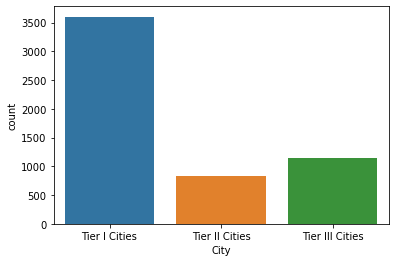

In [203]:
sns.countplot(lead['City'])

plt.show()

- From above graph we can observe 'Tier I Cities' is having highest number of occurances so we will impute 'Mumbai' in place of missing values. 

In [204]:
# Imputing 'Tier I Cities' in place of missing values 

lead["City"].fillna("Tier I Cities", inplace = True)

In [205]:
lead['City'].isnull().sum()

0

### As City Columns is giving more information than Country Columns so we are dropping Country Columns as it is of no use

In [206]:
lead.drop(['Country'], axis = 1, inplace = True)

### 4.3 Imputation in 'What is your current occupation ' column

In [207]:
# Imputation for 'What is your current occupation' column

lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

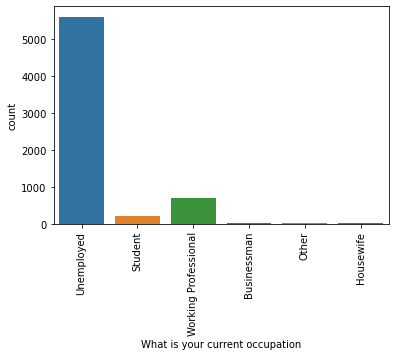

In [208]:
sns.countplot(lead['What is your current occupation'])
xticks(rotation = 90)
plt.show()

- From above graph we can observe 'Unemployed' followed by Working Professional and Student is having highest number of occurances so we will impute them Randomly in place of missing values.

In [209]:
lead['What is your current occupation'].fillna('XNA' , inplace = True)
lead = lead.sort_values(by = 'What is your current occupation', ascending = False)

In [210]:
import random
random__occupation = ['Unemployed', 'Working Professional', 'Student']

for i in range(len(lead)):
    if lead['What is your current occupation'][i] == 'XNA':
        var = random.choice(random__occupation)
        lead['What is your current occupation'][i] = lead['What is your current occupation'][i].replace(lead['What is your current occupation'][i], var)

In [211]:
lead['What is your current occupation'].value_counts()

Unemployed              6517
Working Professional    1583
Student                 1106
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [212]:
# Checking Missing Values
lead['What is your current occupation'].isnull().sum()

0

### Concating 'Housewife' and 'Businessman' with 'Other'

In [213]:
for i in range(len(lead)):
    if (lead['What is your current occupation'][i] == 'Housewife') or (lead['What is your current occupation'][i] == 'Businessman'):
        lead['What is your current occupation'][i] = lead['What is your current occupation'][i].replace(lead['What is your current occupation'][i], 'Other')

### 4.4 Imputation In 'Specialization' column


In [214]:
# Imputation for 'Specialization' column

lead['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

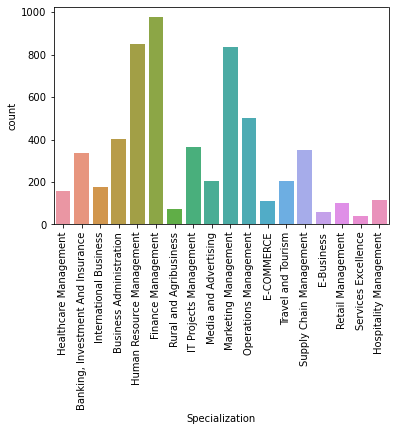

In [215]:
sns.countplot(lead['Specialization'])
xticks(rotation = 90)
plt.show()

- From above graph we can observe 'Finance Management' followed by Human Resource Management, Marketing Management and Operations Management is having highest number of occurances so we will impute them Randomly in place of missing values.

In [216]:
random__Specializations = ['Finance Management','Human Resource Management', 'Marketing Management',
                         'Operations Management']

for i in range(len(lead)):
    if lead.Specialization[i] == 'XNA':
        var = random.choice(random__Specializations)
        lead.Specialization[i] = lead.Specialization[i].replace(lead.Specialization[i], var)

- We Can make Category of Specialization Column to make ease in understanding expect Finance Management, Human Resource Management, Marketing Management and Operations Management other specialization we will put in under 'Other' Category 

In [217]:
for i in range(len(lead)):
    if (lead.Specialization[i] != 'Finance Management') and (lead.Specialization[i] != 'Human Resource Management') and (lead.Specialization[i] != 'Marketing Management') and (lead.Specialization[i] != 'Operations Management'):
        lead.Specialization[i] = 'Other'

In [218]:
# Checking Imputation

lead['Specialization'].value_counts()

Other                        6075
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [219]:
# Checking Missing Values

lead['Specialization'].isnull().sum()

0

### 4.5 Imputation in ' What matters most to you in choosing a course ' column

In [220]:
# Imputation for 'What matters most to you in choosing a course' column

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- What matters most to you in choosing a course columns gives no information to us so we are dropping this columns

In [221]:
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### 4.6 Imputation in 'Total Visits'

In [222]:
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

- Imputing TotalVisits using Median

In [223]:
lead['TotalVisits'].fillna(round(lead['TotalVisits'].median(),2), inplace = True)

In [224]:
lead['TotalVisits'].isnull().sum()

0

### 4.7 Imputation in 'Page Views Per Visit'

In [225]:
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

- Imputing Page Views Per Visit using Median

In [226]:
lead['Page Views Per Visit'].fillna(round(lead['Page Views Per Visit'].median(),2), inplace = True)

lead['Page Views Per Visit'].isnull().sum()

0

#### Dropping of Lead Number

- As Lead number and Prospect ID gives same information so we are dropping 'Lead Number' as is having numeric value in columns

In [227]:
lead.drop(['Lead Number'], axis = 1, inplace = True)

## Step 4.3 Examine Categorical Columns

In [228]:
lead['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

- Adding 'Lead Import', 'Quick Add Form' in 'Lead Add Form' for ease in understanding

In [229]:
for i in range(len(lead)):
    if (lead['Lead Origin'][i] == 'Lead Import') or (lead['Lead Origin'][i] == 'Quick Add Form'):
        lead['Lead Origin'][i] = lead['Lead Origin'][i].replace(lead['Lead Origin'][i], 'Lead Add Form')

In [230]:
lead['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               8.376623
Name: Lead Origin, dtype: float64

In [231]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,API,Organic Search,0,5.0,271,1.25,Email Opened,Other,Unemployed,NaN,NaN,Tier III Cities,Yes,Email Opened
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,Landing Page Submission,Direct Traffic,1,14.0,1336,2.80,Email Opened,Other,Student,Lost to EINS,NaN,Tier I Cities,Yes,Email Opened
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,Landing Page Submission,Google,1,9.0,1402,3.00,Email Opened,Other,Unemployed,NaN,NaN,Tier III Cities,Yes,Email Opened
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,Landing Page Submission,Direct Traffic,0,2.0,130,2.00,Unreachable,Other,Unemployed,NaN,NaN,Tier I Cities,Yes,Modified
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,Landing Page Submission,Google,1,4.0,395,4.00,SMS Sent,Other,Working Professional,NaN,NaN,Tier III Cities,Yes,SMS Sent


## Step 5. EDA

### 5.1 Assigning numerical variables to 'A free copy of Mastering The Interview'  with 'Yes' to 1 and 'No' to 0

In [232]:
# creating dictionary for two categories

category={"No":0,"Yes":1}    # creating dictionary for two categories


# Column 'A free copy of Mastering The Interview'

lead['A free copy of Mastering The Interview']= lead['A free copy of Mastering The Interview'].map(category)


### Here 'Converted' is our target variable 

In [233]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 2035 to 4204
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    5887 non-null   o

## 5.2 MultiVariate Analysis

### 5.2.1  Lead Origin

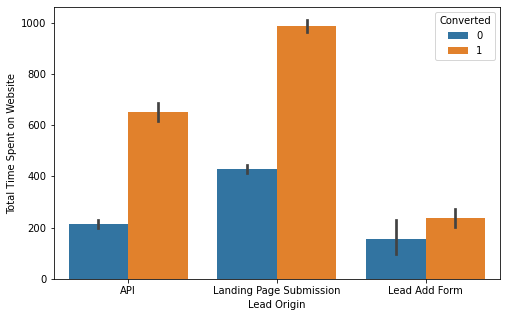

In [234]:
plt.figure(figsize=(8,5))
sns.barplot(x = "Lead Origin", hue = "Converted", y='Total Time Spent on Website', data = lead)

plt.show()

#### Inferences

-  In Api and Landing Page Submission we can observe that it brings out highest number of leads as well as conversion.

-  Lead add form has lower count of lead but it has higher conversion rate.

-  So by this observation we have to generate more leads from Lead Add Form and improve lead conversion rate of API and        Landing Page Submission origin in order to increase overall lead conversion rate

### 5.2.2 Lead Source

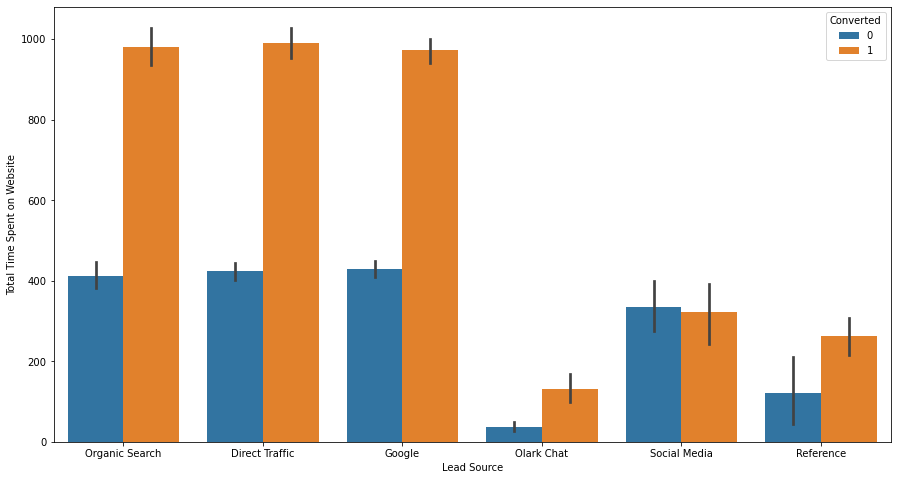

In [235]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Lead Source", hue = "Converted", y = 'Total Time Spent on Website', data = lead)

plt.show()

### Inferences

- Organic Search, Direct Traffic and Google has high conversion rate
- Reference and Olark Chat we can observe that it is generating maximum number of leads. 
- Social Media have lowest conversion rate as compared to others.
- So by this observation we have to focus more on 'Social Media', 'Organic search', 'Direct traffic' and 'Google' leads to improve overall lead conversion rate.

### 5.2.3  City

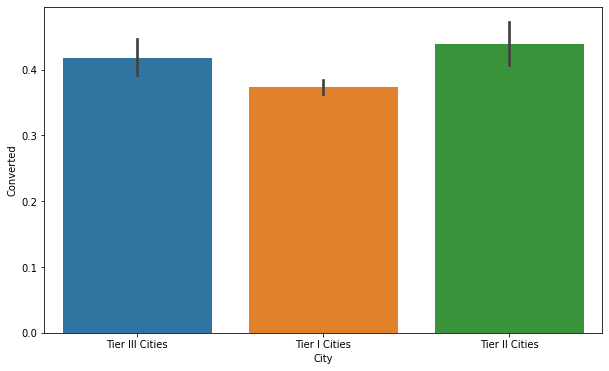

In [236]:
fig, axs = plt.subplots(figsize = (10,6))
sns.barplot(x = "City", y = "Converted",data = lead)

plt.show()

### Inferences

- Tier I Cities, Tier II Cities, Tier III Cities are equally important for analysis.

### 5.2.4 Last Activity

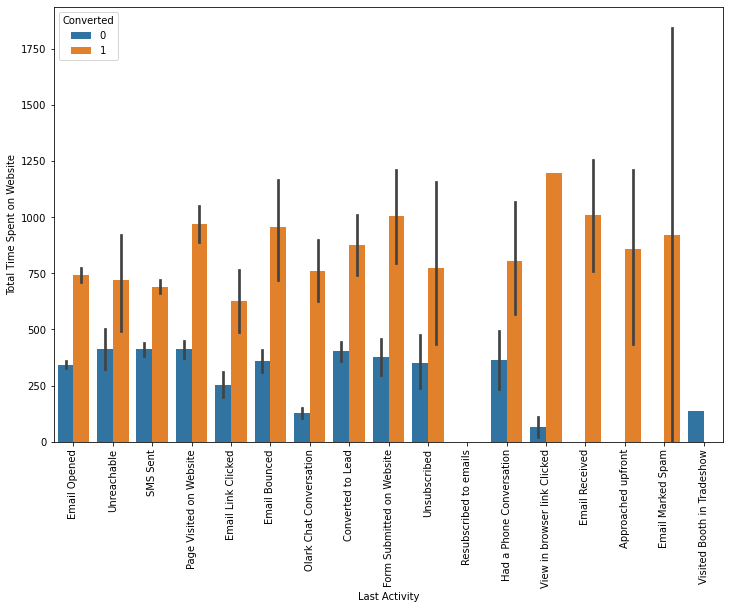

In [237]:
fig, axs = plt.subplots(figsize = (12,8))
sns.barplot(x = "Last Activity", hue = "Converted", y = 'Total Time Spent on Website', data = lead)
xticks(rotation = 90)
plt.show()

### Inferences

- Conversion rate of View in browser link clicked is Highest compared with others followed by Olark Chart Conversation.


### 5.2.5 Numeric Columns

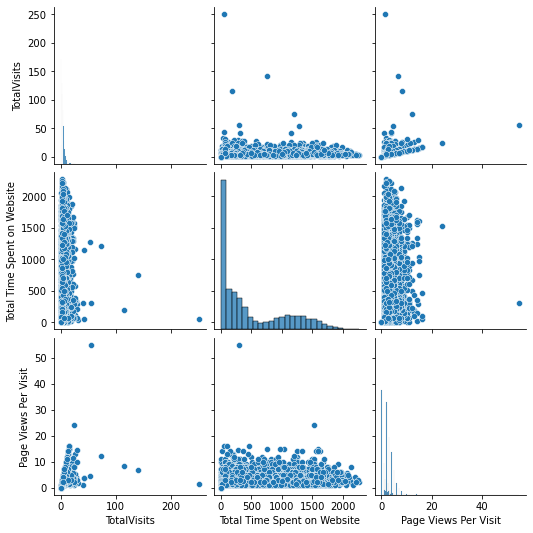

In [238]:
numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#plt.figure(figsize = [24,24])
sns.pairplot(lead[numerical_columns])
plt.show()


### 5.2.6 What is your current occupation

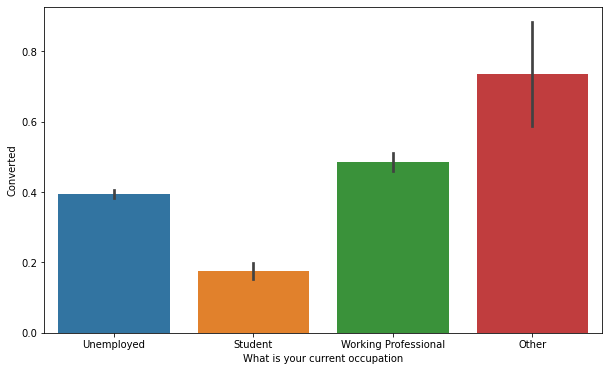

In [239]:
fig, axs = plt.subplots(figsize = (10,6))
sns.barplot(x = "What is your current occupation", y = "Converted",data = lead)

plt.show()

### Inferences

- Other Category are highest in number followed by Working Professional 

### Dropping redundant columns

In [240]:
# Dropping column 'Last Activity','Lead Profile','Last Notable Activity','Tags'

redundant_column = ['Last Activity','Lead Profile','Last Notable Activity','Tags']
lead = lead.drop(redundant_column,1)

## 5.3 Univariate Analysis

In [241]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000
max,1.000000,251.000000,2272.000000,55.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

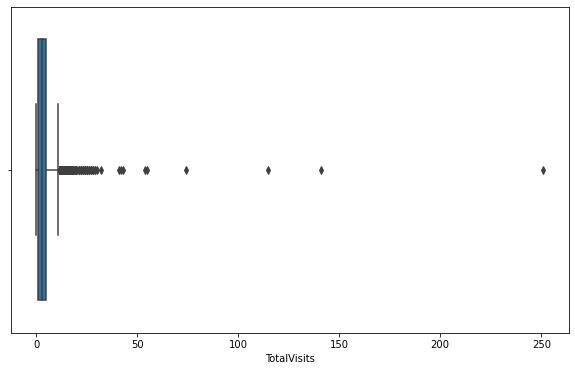

In [242]:
plt.figure(figsize = [10,6])
sns.boxplot(x = 'TotalVisits', data = lead)
plt.show

### Inference 

- In Columns 'Page Views Per Visit ' and 'TotalVisits' have outliers so we have to treat them

- To overcome outliers problem Lets assume that customers has not visited website more than 35 times

In [243]:
lead = lead[lead.TotalVisits < 35]

In [244]:
lead.shape

(9231, 11)

### 5.3.1 Page Views Per Visit

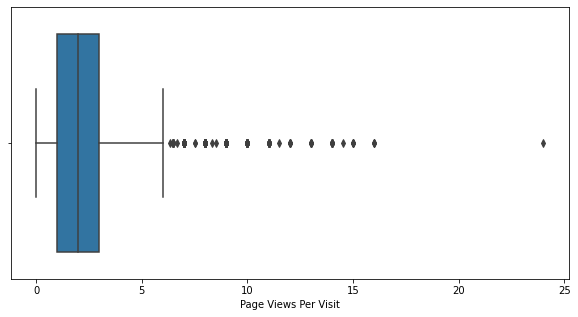

In [245]:
plt.figure(figsize=[10,5])
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

### 5.3.2 Total Visits

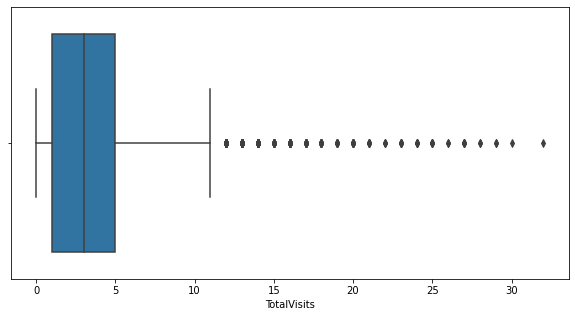

In [246]:
plt.figure(figsize=[10,5])
sns.boxplot(lead['TotalVisits'])
plt.show()

### 5.2.3 Total Time Spent on Website

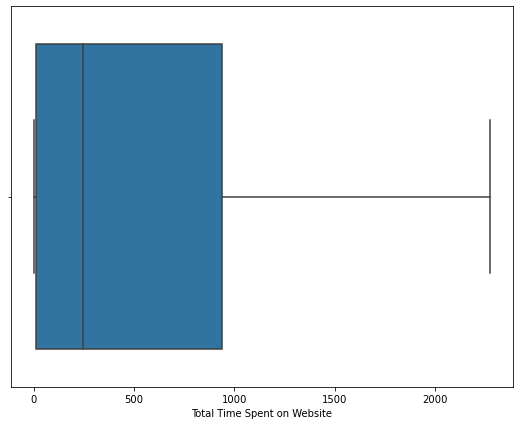

In [247]:
plt.figure(figsize=[9,7])
sns.boxplot(lead['Total Time Spent on Website'])
plt.show()

In [248]:
#Percentage of missing values for all columns 

null_count = round(100*(lead.isnull().sum()/len(lead.index)),2)
null_count

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### Now data is free from missing values and ready for further analysis

## Step 6: Data Preparation

### 6.1 Created dummy variable for some of the categorical variables

In [249]:
dummy_lead_1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)
dummy_lead_1.head()



,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
2244,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3737,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
2234,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4211,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


In [250]:
# Adding the results To lead data set

lead = pd.concat([lead, dummy_lead_1], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,API,Organic Search,0,5.0,271,1.25,Other,Unemployed,Tier III Cities,...,0,0,0,0,1,0,1,0,0,1
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,Landing Page Submission,Direct Traffic,1,14.0,1336,2.80,Other,Student,Tier I Cities,...,0,0,0,0,1,1,0,0,0,0
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,Landing Page Submission,Google,1,9.0,1402,3.00,Other,Unemployed,Tier III Cities,...,0,0,0,0,1,0,1,0,0,1
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,Landing Page Submission,Direct Traffic,0,2.0,130,2.00,Other,Unemployed,Tier I Cities,...,0,0,0,0,1,0,1,0,0,0
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,Landing Page Submission,Google,1,4.0,395,4.00,Other,Working Professional,Tier III Cities,...,0,0,0,0,1,0,0,1,0,1


In [251]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)

In [252]:
lead.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2035,09f4e67b-c462-48a2-9c15-5d707364b8a9,0,5.0,271,1.25,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2244,6a463a83-3c5e-42e5-bb0e-e8e65f19b930,1,14.0,1336,2.80,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3737,eb84b904-5ae5-45a7-be60-257b21408b2c,1,9.0,1402,3.00,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
2234,ef6ab1b4-d791-4c66-afd2-3a9fbca1c5f4,0,2.0,130,2.00,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4211,b298550c-1993-48b9-a94f-7cdd1cb2f9c2,1,4.0,395,4.00,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1


## 6.2 Spiliting data set

In [253]:
# Importing Necessary library for model building

from sklearn.model_selection import train_test_split

In [254]:
# Splitting the data into train and test

df_train, df_test = train_test_split(lead, train_size = 0.7, random_state = 100)

## 6.3 Feature Scaling

In [255]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.head()


,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Lead Source_Social Media,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Tier II Cities,City_Tier III Cities
2197,fb240769-8db1-4572-ae96-1ef4ca9187cd,1,0.09375,0.325264,0.125000,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
6915,c6e4aa08-4f28-4703-8587-997f748efcef,0,0.12500,0.062060,0.083333,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
6309,5ce5518b-68f6-45c5-ab60-a358eb64d7d9,1,0.00000,0.000000,0.000000,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
6135,dc8d1b8a-0b55-4444-8683-079eefeaac2e,0,0.00000,0.000000,0.000000,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
709,4d00b9be-fa39-44fd-8a9f-ed5960d80c77,1,0.03125,0.529489,0.041667,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [256]:
y_train = df_train.Converted
X_train = df_train.drop(['Converted','Prospect ID'],axis =1)

In [257]:
X_train.shape

(6461, 20)

In [258]:
y_train.shape

(6461,)

In [259]:
y_test = df_test.Converted
X_test = df_test.drop(['Converted','Prospect ID'],axis =1)

In [260]:
X_test.shape


(2770, 20)

In [261]:
y_test.shape

(2770,)

## 6.4 Correlation in dataset

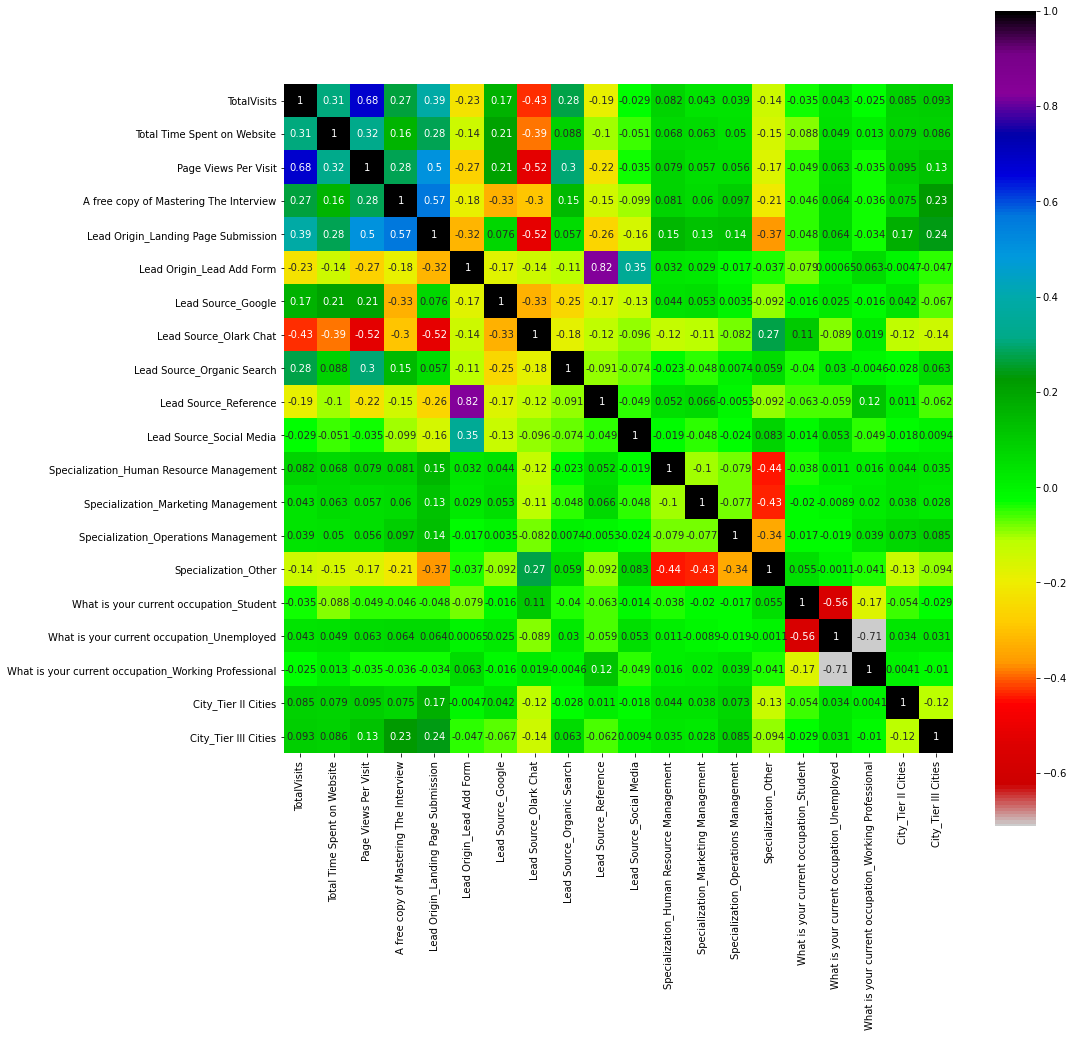

In [262]:
corr = X_train.corr()

plt.figure(figsize = [15,15])
sns.heatmap(corr, annot = True, square = True, cmap = 'nipy_spectral_r')
plt.show()


### Inferences

- From above heat map we can observe there is multicollinearity in 'TotalVisits', 'A free copy of Mastering The Interview',   'Lead Source_Organic Search', 'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission' columns to overcome this we will have to remove these column.

In [263]:
dropping_columns = ['TotalVisits', 'A free copy of Mastering The Interview',
             'Lead Source_Organic Search', 'Lead Origin_Lead Add Form','Lead Origin_Landing Page Submission']

In [264]:
# Dropping the columns to overcome multicollinearity

X_train.drop(dropping_columns, axis = 1, inplace = True)

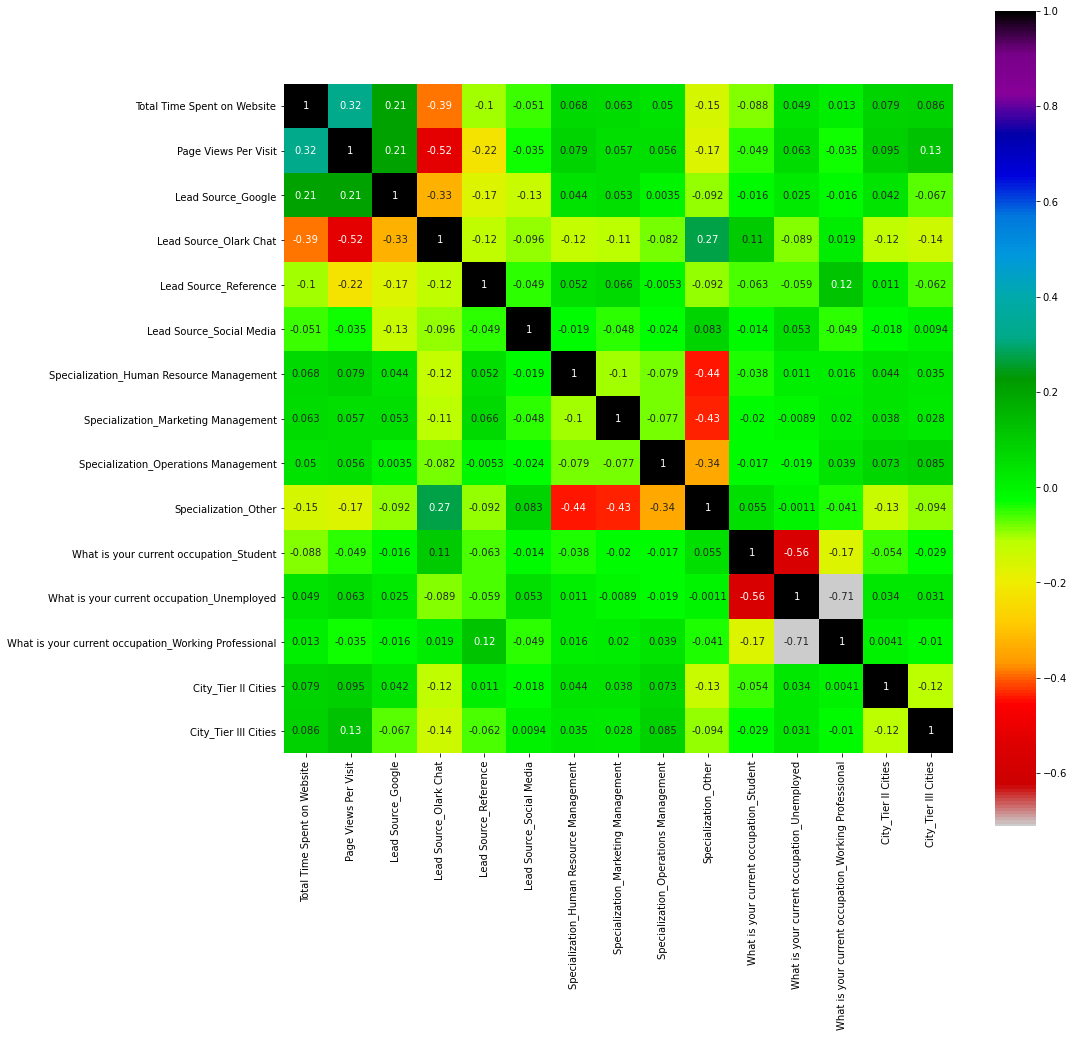

In [265]:
corr = X_train.corr()

plt.figure(figsize = [15,15])
sns.heatmap(corr, annot = True, square = True, cmap = 'nipy_spectral_r')
plt.show()


## Step 7: Model Building

### 7.1 Running First model

In [266]:
import statsmodels.api as sm

In [267]:
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3378.9
Date:                Wed, 13 Oct 2021   Deviance:                       6757.7
Time:                        20:21:35   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7881      0.552     -1.427      0.153      -1.870       0.294
Total Time Spent on Website                              4.3255      0.147     29.443      0.000       4.038       4.613
Page Views Per Visit                                    -0.8689      0.442     -1.966      0.049      -1.735      -0.003
Lead Source_Google                                       0.2904      0.071      4.097      0.000       0.151       0.429
Lead Source_Olark Chat                                   0.8297      0.110      7.576      0.000       0.615       1.044
Lead Source_Reference                                    4.0067      0.216     18.520      0.000       3.583       4.431
Lead Source_Social Media                                 1.6537      0.153     10.838      0.000       1.355       1.953
Specialization_Human Resource Management                -0.0534      0.134     -0.399      0.690      -0.316       0.209
Specialization_Marketing Management                      0.0292      0.136      0.214      0.830      -0.238       0.296
Specialization_Operations Management                     0.0946      0.154      0.616      0.538      -0.206       0.396
Specialization_Other                                    -0.3246      0.102     -3.185      0.001      -0.524      -0.125
What is your current occupation_Student                 -1.8075      0.549     -3.293      0.001      -2.883      -0.732
What is your current occupation_Unemployed              -0.8518      0.540     -1.578      0.115      -1.910       0.206
What is your current occupation_Working Professional    -0.5389      0.543     -0.992      0.321      -1.603       0.526
City_Tier II Cities                                     -0.0233      0.108     -0.216      0.829      -0.235       0.189
City_Tier III Cities                                     0.2046      0.092      2.215      0.027       0.024       0.386
========================================================================================================================
"""

## Step 7.2: Feature Selection Using RFE

In [268]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [269]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)


In [270]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [271]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Tier II Cities', True, 1),
 ('City_Tier III Cities', True, 1)]

In [272]:
col = X_train.columns[rfe.support_]

In [273]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### 7.3 Assessing the model with StatsModels

In [274]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3378.9
Date:                Wed, 13 Oct 2021   Deviance:                       6757.7
Time:                        20:21:36   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7881      0.552     -1.427      0.153      -1.870       0.294
Total Time Spent on Website                              4.3255      0.147     29.443      0.000       4.038       4.613
Page Views Per Visit                                    -0.8689      0.442     -1.966      0.049      -1.735      -0.003
Lead Source_Google                                       0.2904      0.071      4.097      0.000       0.151       0.429
Lead Source_Olark Chat                                   0.8297      0.110      7.576      0.000       0.615       1.044
Lead Source_Reference                                    4.0067      0.216     18.520      0.000       3.583       4.431
Lead Source_Social Media                                 1.6537      0.153     10.838      0.000       1.355       1.953
Specialization_Human Resource Management                -0.0534      0.134     -0.399      0.690      -0.316       0.209
Specialization_Marketing Management                      0.0292      0.136      0.214      0.830      -0.238       0.296
Specialization_Operations Management                     0.0946      0.154      0.616      0.538      -0.206       0.396
Specialization_Other                                    -0.3246      0.102     -3.185      0.001      -0.524      -0.125
What is your current occupation_Student                 -1.8075      0.549     -3.293      0.001      -2.883      -0.732
What is your current occupation_Unemployed              -0.8518      0.540     -1.578      0.115      -1.910       0.206
What is your current occupation_Working Professional    -0.5389      0.543     -0.992      0.321      -1.603       0.526
City_Tier II Cities                                     -0.0233      0.108     -0.216      0.829      -0.235       0.189
City_Tier III Cities                                     0.2046      0.092      2.215      0.027       0.024       0.386
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of City_Tier II Cities is higher than 0.05 so we are dropping Specialization_Operations Management column

In [275]:
col = col.drop('City_Tier II Cities')

In [276]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [277]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3378.9
Date:                Wed, 13 Oct 2021   Deviance:                       6757.8
Time:                        20:21:37   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7909      0.552     -1.433      0.152      -1.873       0.291
Total Time Spent on Website                              4.3246      0.147     29.450      0.000       4.037       4.612
Page Views Per Visit                                    -0.8724      0.442     -1.975      0.048      -1.738      -0.007
Lead Source_Google                                       0.2906      0.071      4.101      0.000       0.152       0.430
Lead Source_Olark Chat                                   0.8311      0.109      7.601      0.000       0.617       1.045
Lead Source_Reference                                    4.0067      0.216     18.520      0.000       3.583       4.431
Lead Source_Social Media                                 1.6543      0.153     10.842      0.000       1.355       1.953
Specialization_Human Resource Management                -0.0529      0.134     -0.396      0.692      -0.315       0.209
Specialization_Marketing Management                      0.0295      0.136      0.217      0.828      -0.237       0.296
Specialization_Operations Management                     0.0936      0.154      0.610      0.542      -0.207       0.394
Specialization_Other                                    -0.3232      0.102     -3.177      0.001      -0.522      -0.124
What is your current occupation_Student                 -1.8069      0.549     -3.292      0.001      -2.883      -0.731
What is your current occupation_Unemployed              -0.8523      0.540     -1.579      0.114      -1.910       0.206
What is your current occupation_Working Professional    -0.5394      0.543     -0.993      0.321      -1.604       0.525
City_Tier III Cities                                     0.2077      0.091      2.275      0.023       0.029       0.387
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Marketing Management is higher than 0.05 so we are dropping Specialization_Marketing Management column

In [278]:
col = col.drop('Specialization_Marketing Management')

In [279]:
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Specialization_Human Resource Management',
       'Specialization_Operations Management', 'Specialization_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier III Cities'],
      dtype='object')

In [280]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3378.9
Date:                Wed, 13 Oct 2021   Deviance:                       6757.8
Time:                        20:21:37   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7731      0.546     -1.417      0.157      -1.842       0.296
Total Time Spent on Website                              4.3251      0.147     29.457      0.000       4.037       4.613
Page Views Per Visit                                    -0.8726      0.442     -1.976      0.048      -1.738      -0.007
Lead Source_Google                                       0.2909      0.071      4.106      0.000       0.152       0.430
Lead Source_Olark Chat                                   0.8317      0.109      7.608      0.000       0.617       1.046
Lead Source_Reference                                    4.0080      0.216     18.532      0.000       3.584       4.432
Lead Source_Social Media                                 1.6545      0.153     10.844      0.000       1.355       1.954
Specialization_Human Resource Management                -0.0665      0.118     -0.563      0.573      -0.298       0.165
Specialization_Operations Management                     0.0800      0.140      0.571      0.568      -0.195       0.355
Specialization_Other                                    -0.3368      0.080     -4.213      0.000      -0.493      -0.180
What is your current occupation_Student                 -1.8118      0.548     -3.304      0.001      -2.887      -0.737
What is your current occupation_Unemployed              -0.8569      0.539     -1.589      0.112      -1.914       0.200
What is your current occupation_Working Professional    -0.5440      0.543     -1.003      0.316      -1.607       0.519
City_Tier III Cities                                     0.2079      0.091      2.277      0.023       0.029       0.387
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Human Resource Management is higher than 0.05 so we are dropping Specialization_Human Resource Management column

In [281]:
col = col.drop('Specialization_Human Resource Management')

In [282]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3379.1
Date:                Wed, 13 Oct 2021   Deviance:                       6758.1
Time:                        20:21:37   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7930      0.544     -1.459      0.145      -1.858       0.272
Total Time Spent on Website                              4.3235      0.147     29.457      0.000       4.036       4.611
Page Views Per Visit                                    -0.8742      0.442     -1.980      0.048      -1.740      -0.009
Lead Source_Google                                       0.2905      0.071      4.100      0.000       0.152       0.429
Lead Source_Olark Chat                                   0.8306      0.109      7.600      0.000       0.616       1.045
Lead Source_Reference                                    4.0065      0.216     18.527      0.000       3.583       4.430
Lead Source_Social Media                                 1.6518      0.153     10.831      0.000       1.353       1.951
Specialization_Operations Management                     0.1020      0.135      0.757      0.449      -0.162       0.366
Specialization_Other                                    -0.3148      0.070     -4.512      0.000      -0.451      -0.178
What is your current occupation_Student                 -1.8121      0.547     -3.310      0.001      -2.885      -0.739
What is your current occupation_Unemployed              -0.8579      0.538     -1.594      0.111      -1.913       0.197
What is your current occupation_Working Professional    -0.5449      0.542     -1.006      0.314      -1.607       0.517
City_Tier III Cities                                     0.2073      0.091      2.271      0.023       0.028       0.386
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of Specialization_Operations Management is higher than 0.05 so we are dropping Specialization_Operations Management column

In [283]:
col = col.drop('Specialization_Operations Management')

In [284]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3379.4
Date:                Wed, 13 Oct 2021   Deviance:                       6758.7
Time:                        20:21:37   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7829      0.543     -1.441      0.150      -1.848       0.282
Total Time Spent on Website                              4.3228      0.147     29.453      0.000       4.035       4.610
Page Views Per Visit                                    -0.8785      0.441     -1.990      0.047      -1.744      -0.013
Lead Source_Google                                       0.2887      0.071      4.077      0.000       0.150       0.427
Lead Source_Olark Chat                                   0.8299      0.109      7.596      0.000       0.616       1.044
Lead Source_Reference                                    4.0012      0.216     18.513      0.000       3.578       4.425
Lead Source_Social Media                                 1.6515      0.152     10.829      0.000       1.353       1.950
Specialization_Other                                    -0.3322      0.066     -5.047      0.000      -0.461      -0.203
What is your current occupation_Student                 -1.8037      0.547     -3.296      0.001      -2.876      -0.731
What is your current occupation_Unemployed              -0.8498      0.538     -1.579      0.114      -1.905       0.205
What is your current occupation_Working Professional    -0.5348      0.542     -0.988      0.323      -1.596       0.527
City_Tier III Cities                                     0.2103      0.091      2.305      0.021       0.032       0.389
========================================================================================================================
"""

### Inferences

- Here we can observe p-value of What is your current occupation_Working Professional is higher than 0.05 so we are dropping What is your current occupation_Working Professional column

In [285]:
col = col.drop('What is your current occupation_Working Professional')

In [286]:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3379.9
Date:                Wed, 13 Oct 2021   Deviance:                       6759.7
Time:                        20:21:37   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.3075      0.114    -11.434      0.000      -1.532      -1.083
Total Time Spent on Website                    4.3239      0.147     29.464      0.000       4.036       4.612
Page Views Per Visit                          -0.8754      0.441     -1.983      0.047      -1.741      -0.010
Lead Source_Google                             0.2869      0.071      4.054      0.000       0.148       0.426
Lead Source_Olark Chat                         0.8277      0.109      7.579      0.000       0.614       1.042
Lead Source_Reference                          4.0007      0.216     18.514      0.000       3.577       4.424
Lead Source_Social Media                       1.6501      0.153     10.820      0.000       1.351       1.949
Specialization_Other                          -0.3328      0.066     -5.058      0.000      -0.462      -0.204
What is your current occupation_Student       -1.2779      0.126    -10.180      0.000      -1.524      -1.032
What is your current occupation_Unemployed    -0.3242      0.077     -4.184      0.000      -0.476      -0.172
City_Tier III Cities                           0.2085      0.091      2.287      0.022       0.030       0.387
==============================================================================================================
"""

### Inferences

- Here we can observe p-value of all features are less than 0.05

### 7.4 Checking VIFs

In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = ['VIF'], ascending = False)
vif


,Features,VIF
8,What is your current occupation_Unemployed,3.40
6,Specialization_Other,2.81
1,Page Views Per Visit,2.79
0,Total Time Spent on Website,2.03
3,Lead Source_Olark Chat,1.82
2,Lead Source_Google,1.66
7,What is your current occupation_Student,1.42
9,City_Tier III Cities,1.17
5,Lead Source_Social Media,1.11
4,Lead Source_Reference,1.09


### Inferences

- As we can observe from above table all the features has VIF less than 5 so it gives result as data has no collinearity.

### 7.5 Assesing model

In [288]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2197    0.208447
6915    0.185093
6309    0.422050
6135    0.110032
709     0.712636
235     0.127697
7853    0.780285
8728    0.558411
1193    0.744783
5730    0.108324
dtype: float64

In [289]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20844653, 0.18509308, 0.42204967, 0.11003173, 0.71263586,
       0.12769733, 0.78028458, 0.55841087, 0.74478321, 0.1083239 ])

In [290]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability': y_train_pred})
y_train_pred_final['Cust_ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_probability,Cust_ID
0,1,0.208447,2197
1,0,0.185093,6915
2,1,0.422050,6309
3,0,0.110032,6135
4,1,0.712636,709


In [291]:
y_train_pred_final = y_train_pred_final.sort_values(by = 'Converted_probability', ascending = False)
y_train_pred_final.head()


,Converted,Converted_probability,Cust_ID
3510,1,0.997554,639
3202,1,0.997332,6712
5478,1,0.997256,2656
1997,1,0.996859,3032
3407,1,0.996712,6565


## Step 8: Plotting the ROC Curve 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [292]:
from sklearn import metrics
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [293]:


def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [294]:

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )


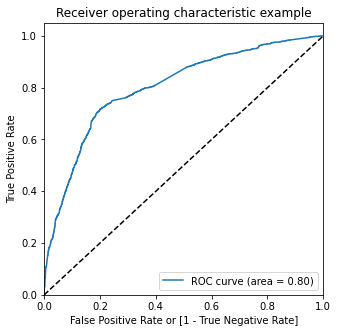

In [295]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Points to be concluded from above ROC curve -

- The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
- The area under the curve is 80% of the total area.



## Step 9: Finding Optimal Cutoff Point

In [296]:

# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()  



,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3510,1,0.997554,639,1,1,1,1,1,1,1,1,1,1
3202,1,0.997332,6712,1,1,1,1,1,1,1,1,1,1
5478,1,0.997256,2656,1,1,1,1,1,1,1,1,1,1
1997,1,0.996859,3032,1,1,1,1,1,1,1,1,1,1
3407,1,0.996712,6565,1,1,1,1,1,1,1,1,1,1


- Now after finding series of probability next step is to check Accuracy, Sensitivity and Specificity for each point

In [297]:
from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.390342    1.000000     0.000000
0.1          0.1  0.419904    0.994449     0.052044
0.2          0.2  0.586597    0.917922     0.374461
0.3          0.3  0.726513    0.764076     0.702463
0.4          0.4  0.767993    0.683584     0.822036
0.5          0.5  0.754682    0.582871     0.864686
0.6          0.6  0.733013    0.473830     0.898959
0.7          0.7  0.706083    0.342189     0.939071
0.8          0.8  0.676366    0.212926     0.973090
0.9          0.9  0.647578    0.108644     0.992638


<Figure size 864x864 with 0 Axes>

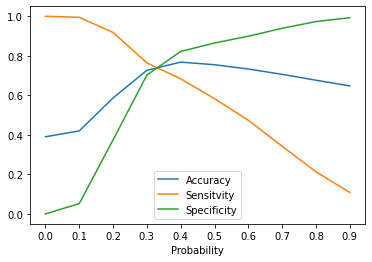

In [298]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

plt.figure(figsize = [12,12])
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.xticks(numbers)
plt.show()


### Inferences

- From above plot we can observe probability threshold is nearly 0.3. Considering 0.3 to tradeoff sensitivity against accuracy

In [299]:

# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_train_pred_final.head()



,Converted,Converted_probability,Cust_ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
3510,1,0.997554,639,1,1,1,1,1,1,1,1,1,1,1
3202,1,0.997332,6712,1,1,1,1,1,1,1,1,1,1,1
5478,1,0.997256,2656,1,1,1,1,1,1,1,1,1,1,1
1997,1,0.996859,3032,1,1,1,1,1,1,1,1,1,1,1
3407,1,0.996712,6565,1,1,1,1,1,1,1,1,1,1,1


## Step 10: Precision and Recall

In [300]:
# Creating confusion matrix to find precision and recall score

confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[2767, 1172],
       [ 595, 1927]], dtype=int64)

In [301]:
print('Precision Value is',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1])*100) 

print('Recall Value is',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1])*100) 

Precision Value is 62.18134882220071
Recall Value is 76.40761300555114


### Inferences

- We will focus more on Recall value rather than Precision value because we don't want to miss the lead which are willing to get converted rather than who the one who is having low probability to get converted. 

In [302]:
# Getting Sensitivity
sensitivity = confusion_pr[1,1]/(confusion_pr[1,1] + confusion_pr[1,0])
sensitivity*100

76.40761300555114

In [303]:
# Getting Specificity
specificity = confusion_pr[0,0]/(confusion_pr[0,0]+confusion_pr[0,1])
specificity*100

70.24625539477026

In [304]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
accuracy*100

72.65129236960223

### Sensitivity for Training Data set is 76.40%

### Specificity for Training Data set is 70.24%

### Accuracy for Training Data setis 72.65%


## 10.2 Precision and Recall Tradeoff 

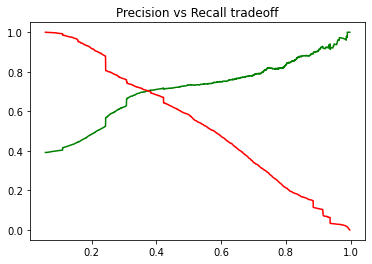

In [305]:
from sklearn.metrics import precision_recall_curve

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

### Inferences

- From above plot we can observe there is tradeoff between Precision and recall and optinum point is nearly at 0.4

## Step 11 : Making predictions on the test set

In [306]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns]) 

In [307]:
X_test = X_test[col]
X_test.head()


,Total Time Spent on Website,Page Views Per Visit,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Specialization_Other,What is your current occupation_Student,What is your current occupation_Unemployed,City_Tier III Cities
2462,0.047975,0.083333,1,0,0,0,1,0,1,1
5632,0.132482,0.083333,0,0,1,0,0,0,1,0
3521,0.500000,0.208333,1,0,0,0,0,0,0,0
6713,0.506602,0.083333,0,0,0,0,1,1,0,0
8247,0.168574,0.083333,0,0,0,0,0,0,1,0


In [308]:
X_test_sm = sm.add_constant(X_test)

In [309]:
y_test_pred = res.predict(X_test_sm)

In [310]:
y_test_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)


In [311]:
y_test_df['Cust_ID'] = y_test_df.index

In [312]:
y_test_df.reset_index(drop = True, inplace = True)
y_test_1.reset_index(drop = True, inplace = True)

In [313]:
y_pred_final = pd.concat([y_test_1,y_test_df], axis = 1)

In [314]:
y_pred_final.head()

,0,Converted,Cust_ID
0,0.208405,0,2462
1,0.946291,0,5632
2,0.722915,1,3521
3,0.309896,0,6713
4,0.273751,0,8247


In [315]:
y_pred_final = y_pred_final.rename(columns = {0:'Converted_probability'})

y_pred_final = y_pred_final[['Cust_ID','Converted','Converted_probability']]

In [316]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.4 else 0)

In [317]:
y_pred_final = y_pred_final.sort_values(by = 'Converted_probability', ascending = False)

y_pred_final.head()

,Cust_ID,Converted,Converted_probability,Final_Predicted
1193,3478,1,0.997073,1
2210,4123,1,0.996810,1
2127,6647,1,0.996764,1
2684,1548,1,0.995746,1
1460,5293,1,0.995360,1


In [318]:
y_pred_final['Score'] = y_pred_final.Converted_probability.apply(lambda x: round(x*100,2))

y_pred_final

,Cust_ID,Converted,Converted_probability,Final_Predicted,Score
1193,3478,1,0.997073,1,99.71
2210,4123,1,0.996810,1,99.68
2127,6647,1,0.996764,1,99.68
2684,1548,1,0.995746,1,99.57
1460,5293,1,0.995360,1,99.54
...,...,...,...,...,...
66,5849,0,0.050406,0,5.04
1005,9113,0,0.048148,0,4.81
2007,322,0,0.044561,0,4.46
6,4762,0,0.042591,0,4.26


In [319]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2


array([[1440,  292],
       [ 327,  711]], dtype=int64)

In [320]:
# Check sensitivity

sensitivity_test = confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])
sensitivity_test*100

68.4971098265896

In [321]:
# Check Specificity

specificity_test = confusion2[0,0]/(confusion2[0,1]+confusion2[0,0])
specificity_test*100

83.14087759815243

In [322]:
# Check Accuracy

accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)
accuracy_test*100

77.6534296028881

### Sensitivity for Training Data set is 68.49%

### Specificity for Training Data set is 83.14%

### Accuracy for Training Data set s 77.65%

## Step 12: Conclusion

- Important features we got during training of model which is responsible for good conversion rate are as follows 
##### 1] Total Time Spent on Website
#####  2] Lead Source_Reference
#####  3] Lead Source_Social Media
 

- We got the Recall value greater than Precision Value also it is acceptable for Business aspect.

- Sensitivity, Specificity, Accuracy we got from test data set when compared with train data set it is in acceptable range.

- The model has ability to adjust as per company requirement